## Solving the time-independent Schrodinger equation using a discretized eigenvalue problem

The 1D time-independent Schrodinger equation (TISE) is: $$ \large \hat{H}\psi = E\psi $$
which is to say: $$ \large -\frac{\hbar^2}{2m}\frac{\partial^2}{\partial x^2}\psi(x) + V(x)\psi(x) = E\psi(x) $$.

It is clearly an eigenvalue problem. By discretizing the space, we obtain a matrix eigenvalue problem.

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import sparse
from scipy.sparse import linalg as sla
from scipy.linalg import *

x_min = -4.
x_max = 4.
Nx = 2000
x = np.linspace(x_min, x_max, Nx)
dx = x[1] - x[0]
n_eigs = 20

#lapl = np.tri(dim+1,dim+1,2) - np.tri(dim+1,dim+1,-2) - 3*np.diag(np.ones(dim+1))

lapl = sparse.eye(Nx, Nx, format='lil') * 2
for i in range(Nx -1):
    lapl[i, i+1] = -1
    lapl[i+1, i] = -1
lapl /= dx**2

def potential(x):
    def v(x):
        return [-100. if np.abs(i)<1 else 0. for i in x ]
    return v(x)

hamiltonian = lapl + sparse.diags(potential(x))
hamiltonian = sparse.csc_matrix(hamiltonian)

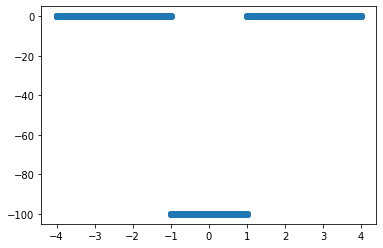

In [49]:
plt.scatter(x,potential(x))

In [50]:
eigenvalues, eigenfunctions = sla.eigs(hamiltonian, k=n_eigs, which='SM')

In [51]:
eigenvalues /= 2
for i in range(n_eigs):
    eigenfunctions[:,i] = eigenfunctions[:,i]/np.sqrt(np.trapz(np.conj(eigenfunctions[:,i])*eigenfunctions[:,i],x))

In [52]:
for n,e in enumerate(np.sort(eigenvalues)):
    print(n,':',np.real(e))

0 : -33.88876805613652
1 : -25.03935220800829
2 : -14.558214679415022
3 : -3.197665805272724
4 : 0.5214369812509811
5 : 0.5986402846466787
6 : 2.0539691254752976
7 : 2.3279512603666146
8 : 4.478119072618657
9 : 5.093639122164308
10 : 7.50872820099677
11 : 8.829670626120851
12 : 10.902797733898472
13 : 13.450497969093778
14 : 15.135142261425424
15 : 18.77413988676291
16 : 20.561055929755188
17 : 24.4374925807588
18 : 27.017497099205773
19 : 30.291003119494025


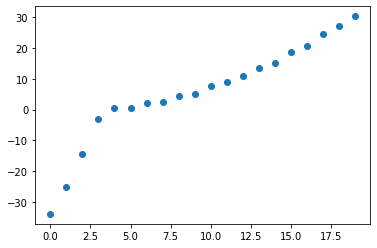

In [53]:
plt.scatter([i for i in range(20)], np.sort(np.real(eigenvalues)))
#plt.scatter([i for i in range(0,20)], [-1/i for i in range(1,21)])

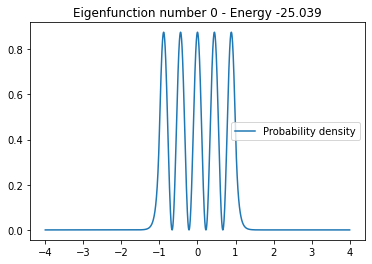

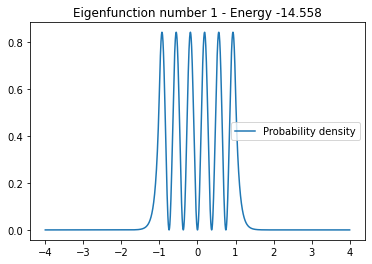

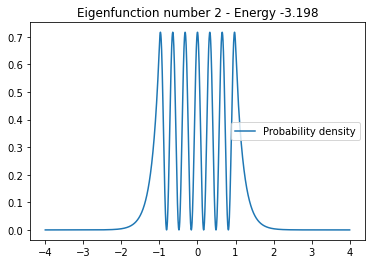

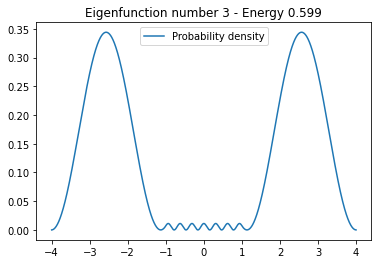

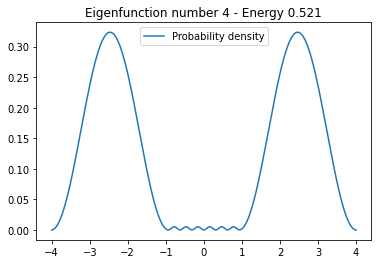

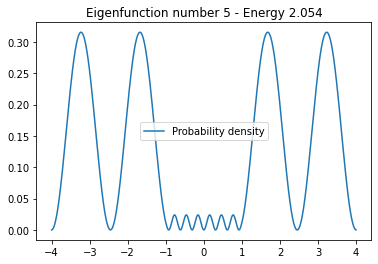

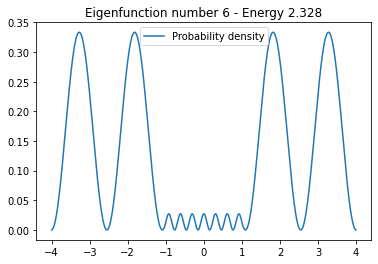

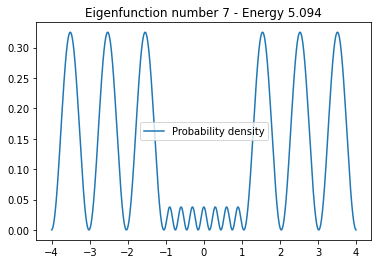

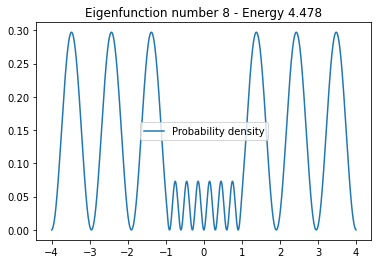

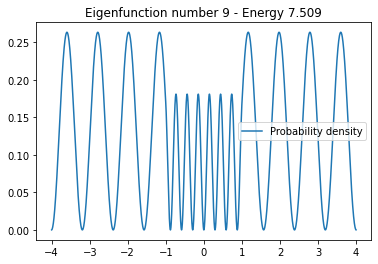

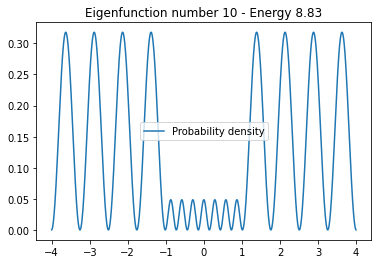

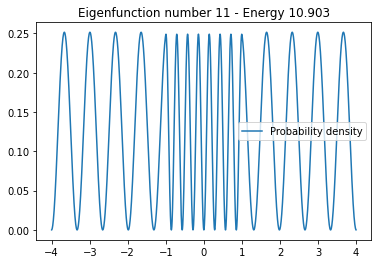

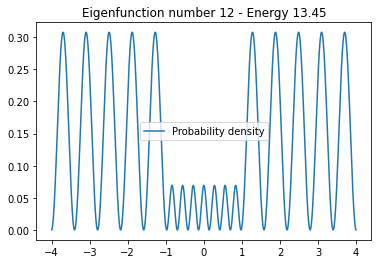

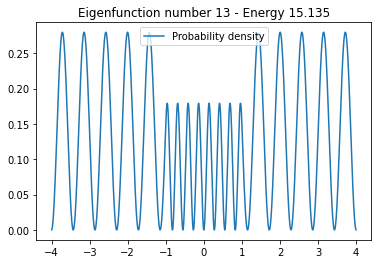

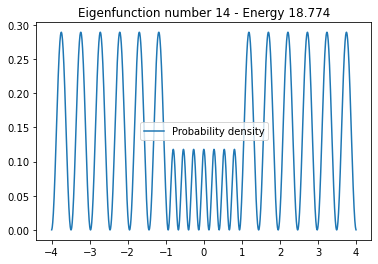

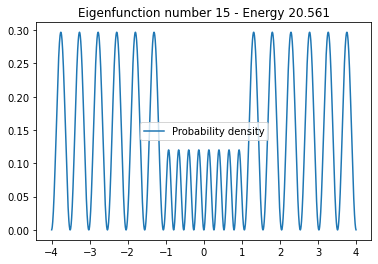

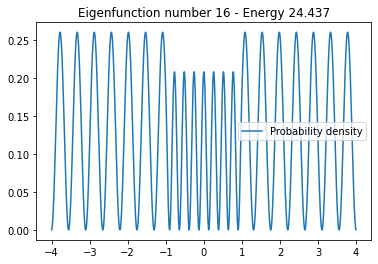

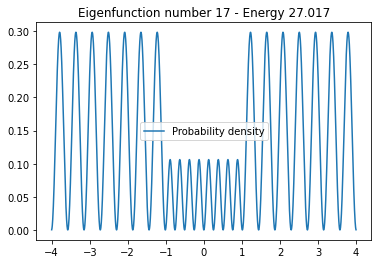

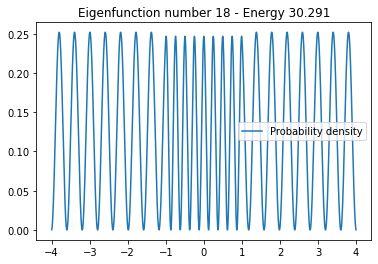

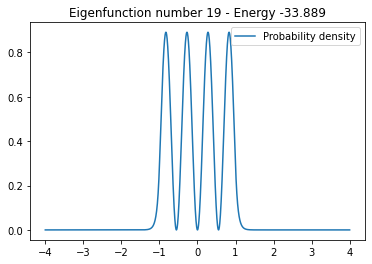

In [54]:
for i in range(n_eigs):
    #plt.plot(eigenfunctions.T[i].real, label='Real part')
    #plt.plot(eigenfunctions.T[i].imag, label='Imaginary part')
    plt.plot(x,np.absolute(eigenfunctions.T[i])**2, label='Probability density')
    plt.title('Eigenfunction number {0} - Energy {1}'.format(i,np.round(eigenvalues[i].real, 3)))
    plt.legend()
    plt.show()

In [28]:
plt.plot(a[:-1])

NameError: name 'a' is not defined